In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset: Startups in San Francisco (from [Kaggle](https://www.kaggle.com/aashay96/san-francisco-based-startups))
<br/>
<font size="3">5% of this dataset contains startups outside of San Francisco. Thus, I'll filter those irrelevant rows out. <br/>
I'm also showing the first 5 rows of the dataset to get a feel of it.</font>

In [26]:
df = pd.read_csv("uStartups.csv")
df_sf = df[df['location'].str.contains("San Francisco")]
df_sf.head()

,name,email,product_desc,high_concept,location,market1,market2,market3
0,Delight,http://delight.io,Delight enlightens developers and designers on...,1 line of code to capture user interaction on ...,San Francisco,User Testing,Usability,Mobile Analytics
1,AnyRoad,http://anyroad.com,AnyRoad is the leader in enterprise experience...,The leader in enterprise experience management.,San Francisco,SaaS,Enterprise Software,Experience Design
3,Code for America,http://codeforamerica.org,The CfA Accelerator is an early stage startup ...,Helping government work better with the people...,San Francisco,Open Source,Governments,Nonprofits
4,Zipongo,http://www.zipongo.com,Free: Web & Mobile shopping list on healthy GO...,Prescription for Healthy Living (Personalized ...,San Francisco,Mobile,Enterprise Software,Food and Beverages
5,FOBO,http://fobo.net,"""FOBO Launches In San Francisco To Become The ...","The fastest, easiest way to sell your electronics",San Francisco,Mobile,Marketplaces,Local


### Which markets are these startups in? <br/>
<font size="3">To understand what are major and sub markets these startups are in, I'm using bar charts to help me visualize the top 10. <br/>
**Market 1** is the major market.</font>

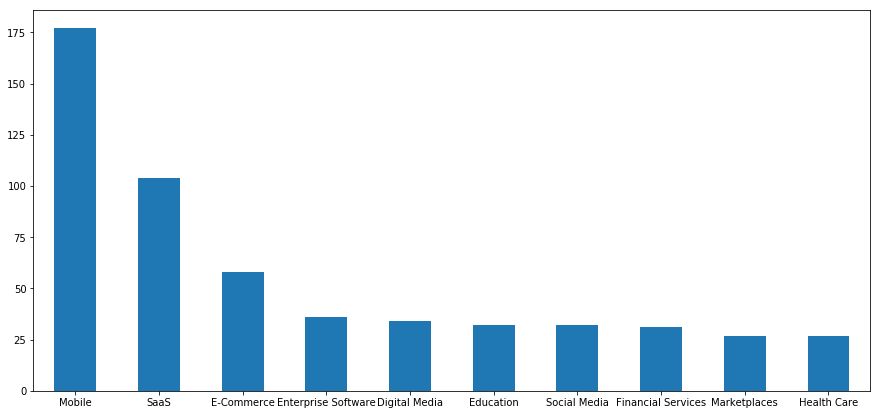

In [70]:
df_sf["market1"].value_counts()[:10].plot(kind='bar', rot=0, figsize=(15, 7))

<font size="3">**Market 2** is the first sub market.</font>

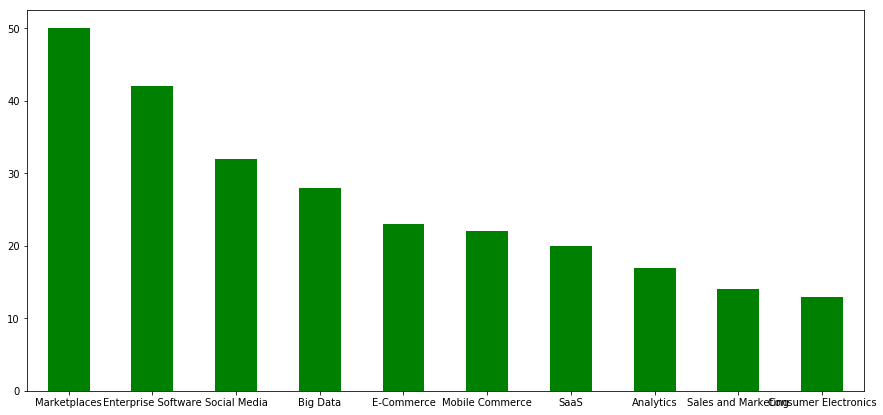

In [71]:
df_sf["market2"].value_counts()[:10].plot(kind='bar', rot=0, figsize=(15, 7), color = 'g')

<font size="3">**Market 3** is the second sub market.</font>

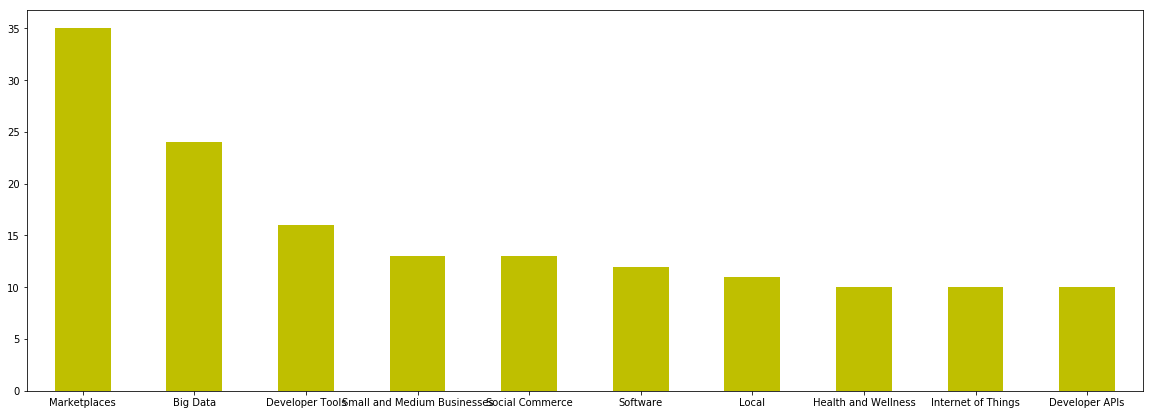

In [75]:
df_sf["market3"].value_counts()[:10].plot(kind='bar', rot=0, figsize=(20, 7), color = 'y')

## Dataset: Registered Business Locations (from [Kaggle](https://www.kaggle.com/san-francisco/sf-registered-business-locations-san-francisco))
<br/>
<font size="3">This dataset will help me determine the optimal location for opening a business.</font>

In [31]:
location_df = pd.read_csv("registered-business-locations-san-francisco.csv")
location_df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0000071-03-001,71,Tournahu George L,1840-42 Jefferson St,1840 Jefferson St #42,San+francisco,CA,94123.0,1968-10-01T00:00:00,NaN,...,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,"{'human_address': '{""address"":""1840 42 JEFFERS..."
1,0000028-02-001,28,Ferrando Louise,3101 Laguna Apts,3101 Laguna St,San Francisco,CA,94123.0,1993-09-30T00:00:00,NaN,...,5300-5399,Real Estate and Rental and Leasing Services,False,False,NaN,NaN,2.0,Marina,NaN,"{'human_address': '{""address"":""3101 LAGUNA ST""..."
2,0000052-01-001,52,Ideal Novak Corp,Ideal Novak Corp,8 Mendosa Ave,San Francisco,CA,94116.0,1968-10-01T00:00:00,NaN,...,5300-5399,Real Estate and Rental and Leasing Services,False,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"{'human_address': '{""address"":""8 MENDOSA AVE"",..."
3,0000071-01-001,71,Tournahu George L,Tournahu Arms,1842 Jefferson St,San Francisco,CA,94123.0,1968-10-01T00:00:00,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,"{'human_address': '{""address"":""1842 JEFFERSON ..."
4,0000071-02-001,71,Tournahu George L,3301 Broderick Apartments,3301 Broderick St,San Francisco,CA,94123.0,1968-10-01T00:00:00,NaN,...,NaN,NaN,False,False,NaN,NaN,2.0,Marina,NaN,"{'human_address': '{""address"":""3301 BRODERICK ..."


<font size="3">Below are all the column names. The dataframe isn't able to show them all.</font>

In [34]:
location_df.columns

Index(['Location Id', 'Business Account Number', 'Ownership Name', 'DBA Name',
       'Street Address', 'City', 'State', 'Source Zipcode',
       'Business Start Date', 'Business End Date', 'Location Start Date',
       'Location End Date', 'Mail Address', 'Mail City', 'Mail Zipcode',
       'Mail State', 'NAICS Code', 'NAICS Code Description', 'Parking Tax',
       'Transient Occupancy Tax', 'LIC Code', 'LIC Code Description',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries',
       'Business Corridor', 'Business Location'],
      dtype='object')

<font size="3">The feature 'Source Zipcode' tells us the zipcode of each business. I'm curious about the 10 most popular zipcodes.</font>

In [58]:
location_df["Source Zipcode"].value_counts().iloc[:10]

94110.0    15556
94103.0    13993
94107.0    12557
94109.0    11602
94102.0     9853
94111.0     8621
94118.0     8425
94122.0     8393
94105.0     8308
94114.0     8173
Name: Source Zipcode, dtype: int64

<font size="3">To figure out the top business categories in those popular zipcodes, I choose the top 4 zipcodes, which have over 10k businesses, to list out top 10 types of businesses. The feature "NAICS Code Description" gives us the description of the business.</font>

In [76]:
# A function to return top 10 business categories in the zipcode area with counts.
def zipcode_counter(zipcode):
    return location_df[location_df["Source Zipcode"] == zipcode]["NAICS Code Description"].value_counts().iloc[:10]

In [77]:
# 94110 - Mission District
zipcode_counter(94110.0)

Real Estate and Rental and Leasing Services         1522
Professional, Scientific, and Technical Services    1341
Food Services                                       1047
Retail Trade                                        1024
Accommodations                                       953
Arts, Entertainment, and Recreation                  887
Private Education and Health Services                535
Construction                                         503
Multiple                                             359
Certain Services                                     263
Name: NAICS Code Description, dtype: int64

In [78]:
# 94110 - SoMa
zipcode_counter(94103.0)

Real Estate and Rental and Leasing Services         1547
Professional, Scientific, and Technical Services    1398
Retail Trade                                        1185
Food Services                                        901
Arts, Entertainment, and Recreation                  515
Accommodations                                       443
Information                                          413
Wholesale Trade                                      374
Multiple                                             333
Construction                                         300
Name: NAICS Code Description, dtype: int64

In [79]:
# 94110 - SoMa
zipcode_counter(94107.0)

Professional, Scientific, and Technical Services    1735
Real Estate and Rental and Leasing Services         1075
Food Services                                        692
Arts, Entertainment, and Recreation                  587
Information                                          568
Retail Trade                                         559
Accommodations                                       306
Construction                                         267
Multiple                                             257
Certain Services                                     251
Name: NAICS Code Description, dtype: int64

In [80]:
zipcode_counter(94109.0)

Real Estate and Rental and Leasing Services         2248
Professional, Scientific, and Technical Services     999
Retail Trade                                         718
Food Services                                        633
Private Education and Health Services                499
Accommodations                                       382
Arts, Entertainment, and Recreation                  359
Certain Services                                     228
Multiple                                             219
Transportation and Warehousing                       175
Name: NAICS Code Description, dtype: int64

<font size="3">Below is an image showing areas representing different zipcodes. Having a map will assist in explaining the locations and zipcodes I'm presenting.</font>
<img src="zipcodes.png", width="600" height="700">

<font size="3">Since this dataset contains not only startups but all businesses in San Francisco, it gives me a glimpse of popular industries holistically. For example, I see Real Estate and Rental and Leasing Services, Professional, Scientific, and Technical Services, Retail Trade, and Food Services appearing among top 4 in the 4 zipcodes I explored. It now comes down to what Zuck wants. If he'd like to join the tech startup community, the optimal location to start would be SoMa. </font>

<img src="coworking_spaces.png", width="600" height="700">

<font size = "3">This was the results I got when I typed "coworking spaces in sf" on Google. Those pins contain co-working spaces as well as rental offices. As it shows, they are located mainly in SoMa. <br/><br/>
Rent is cruicial in deciding on a location. Here's a chart showing the average office rental rates in San Francisco from [statista](https://www.statista.com/statistics/641394/office-space-rental-rates-san-francisco-by-submarket/).
</font> 


<img src="office_rents.png">